In [10]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
def strdate_to_floatdate(data):
#Funcion para convertir los indices de fecha en str a indices en float considerando la unidad el año y como decimales los meses (mes/12) y los dias (dias/30)
    return int(data[0:4])+int(data[5:7])/120+int(data[8:10])/3000

#cargamos los datos de entrada
indice = pd.read_csv("KMEAN_Centroides6K_V1.csv",index_col=[0])
data = pd.read_csv("Matriz_precios_back.csv",index_col=[0])
#veamos cuantas dimensiones y registros contiene
print("Dimensiones de los datos: {}".format(data.shape))
print("Dimensiones del indice : {}".format(indice.shape))

centroides_k6=[]
for i in range(indice.shape[0]): 
    centroides_k6.append(data[indice.iloc[i,:][0]])
    
    cluster=[]
for i in range(len(centroides_k6)):
    X=np.array(centroides_k6[i].index)
    X=np.array(list(map(strdate_to_floatdate,X)))
    X=X.reshape(-1, 1)
    Y=np.array(centroides_k6[i].values)
    X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    clf= DecisionTreeRegressor().fit(X_train,y_train)
    print("\nR2 score Cluster N°"+str(i))
    print(clf.score(x_test,y_test))
    
    tupla=(X_train, x_test, y_train, y_test,clf)
    cluster.append(tupla)


Dimensiones de los datos: (107, 560)
Dimensiones del indice : (6, 1)

R2 score Cluster N°0
0.983529250114062

R2 score Cluster N°1
-1.4269376710034054

R2 score Cluster N°2
0.902346036874627

R2 score Cluster N°3
0.6519784129086115

R2 score Cluster N°4
0.9999807778336968

R2 score Cluster N°5
0.494871804641959


0.983529250114062
-1.4269376710034054


In [46]:

def analisis_production_cost(cluster,ix):
    # arange for creating a range of values
    # from min value of X to max value of X
    # with a difference of 0.01 between two
    # consecutive values
    X_grid = np.arange(min(cluster[ix][1]), max(cluster[ix][1]), 0.01)

    # reshape for reshaping the data into
    # a len(X_grid)*1 array, i.e. to make
    # a column out of the X_grid values
    X_grid = X_grid.reshape((len(X_grid), 1))

    # scatter plot for original data
    plt.scatter(cluster[ix][1], cluster[ix][3], color = 'red')

    # plot predicted data
    plt.plot(X_grid, cluster[ix][4].predict(X_grid), color = 'blue')

    # specify title
    plt.title('Profit to Production Cost (Decision Tree Regression)')

    # specify X axis label
    plt.xlabel('Production Cost')

    # specify Y axis label
    plt.ylabel('Profit')

    # show the plot
    plt.show()


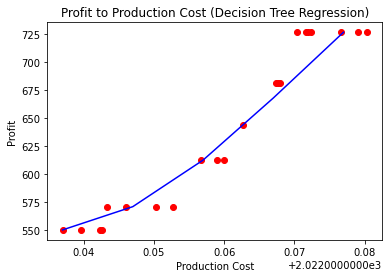

In [47]:
analisis_production_cost(cluster,0)

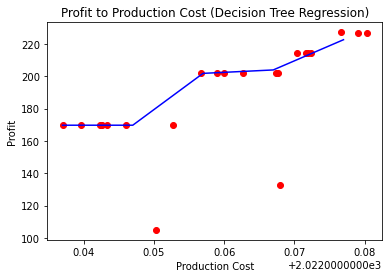

In [48]:
analisis_production_cost(cluster,1)

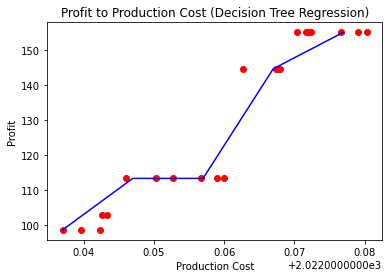

In [49]:
analisis_production_cost(cluster,2)

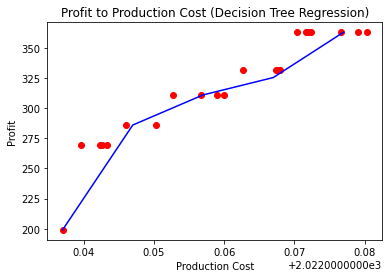

In [50]:
analisis_production_cost(cluster,3)

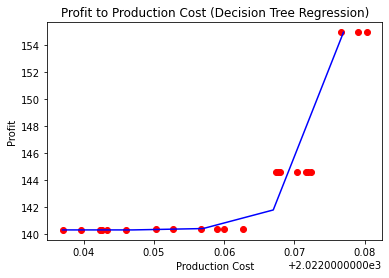

In [51]:
analisis_production_cost(cluster,4)

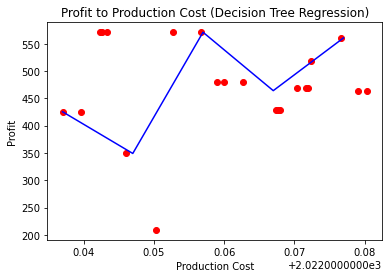

In [52]:
analisis_production_cost(cluster,5)

In [11]:
def error_metrics(cluster,ix):
    Y_predicted=cluster[ix][4].predict(cluster[ix][1])
    sq_err=mean_squared_error(cluster[ix][3], Y_predicted, squared=True)
    print("--"*5)
    print("Error Cuadratico del cluster {} es {}".format(ix,sq_err))
    r2=r2_score(cluster[ix][3], Y_predicted)
    print("El valor de r2 del cluster {} es {}".format(ix,r2))

In [12]:
error_metrics(cluster,0)
error_metrics(cluster,1)
error_metrics(cluster,2)
error_metrics(cluster,3)
error_metrics(cluster,4)
error_metrics(cluster,5)

----------
Error Cuadratico del cluster 0 es 83.57818181818253
El valor de r2 del cluster 0 es 0.983529250114062
----------
Error Cuadratico del cluster 1 es 2273.662695454545
El valor de r2 del cluster 1 es -1.4269376710034054
----------
Error Cuadratico del cluster 2 es 49.98852727272729
El valor de r2 del cluster 2 es 0.902346036874627
----------
Error Cuadratico del cluster 3 es 644.1409454545457
El valor de r2 del cluster 3 es 0.6519784129086115
----------
Error Cuadratico del cluster 4 es 0.0004545454545451445
El valor de r2 del cluster 4 es 0.9999807778336968
----------
Error Cuadratico del cluster 5 es 3525.1842363636374
El valor de r2 del cluster 5 es 0.494871804641959
